In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

(187, 269, 3)


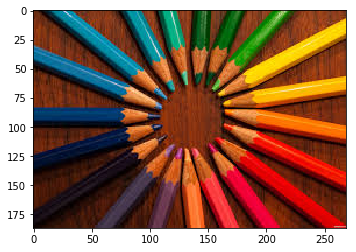

In [22]:
im = cv2.imread("image.png")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
orignal_shape=im.shape
print(im.shape)
plt.imshow(im)
plt.show()

In [23]:
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(50303, 3)


In [24]:
from sklearn.cluster import KMeans

In [25]:
dominant_color=6
km = KMeans(n_clusters=dominant_color)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
km.cluster_centers_

array([[229.28848576,  22.96472663,  23.04761905],
       [ 41.2921041 ,  17.45113115,  12.46584356],
       [ 25.22577797,  75.17832708,  60.34385345],
       [232.50925011, 143.84324248,  34.84253636],
       [ 22.04727031, 138.95106525, 156.52030626],
       [122.57904573,  47.07987027,  20.30161609]])

In [27]:
centers = km.cluster_centers_
centers = np.array(centers,dtype='uint8')

In [28]:
print(centers)

[[229  22  23]
 [ 41  17  12]
 [ 25  75  60]
 [232 143  34]
 [ 22 138 156]
 [122  47  20]]


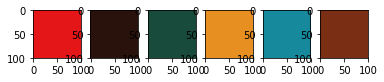

In [29]:
i=1

plt.figure(0,figsize=(6,2))

colors=[]

for each_col in centers:
    plt.subplot(1,6,i)
    i+=1
    
    colors.append(each_col)
    
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
plt.show()

In [30]:
new_img = np.zeros((187*269,3),dtype='uint8')
print(new_img.shape)

(50303, 3)


In [31]:
colors

[array([229,  22,  23], dtype=uint8),
 array([41, 17, 12], dtype=uint8),
 array([25, 75, 60], dtype=uint8),
 array([232, 143,  34], dtype=uint8),
 array([ 22, 138, 156], dtype=uint8),
 array([122,  47,  20], dtype=uint8)]

In [32]:
km.labels_

array([5, 5, 5, ..., 0, 0, 0])

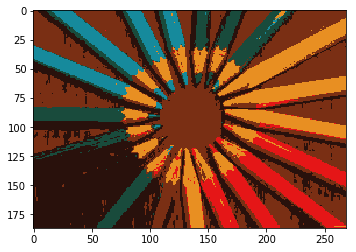

In [33]:
for ix in range (new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
    
new_img = new_img.reshape((orignal_shape))
plt.imshow(new_img)
plt.show()